# Github Link for IE517 at 2023, HW2

https://github.com/kibae-kim/IE-517-ML-in-Fin-Lab-Section-A/tree/main/IE517_F20_HW2

# Import Treasury Squeeze dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Treasury.csv')
df

,rowindex,contract,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
0,1,TUZ92 Comdty,0.157659,0.900783,0.016053,1.000000,1.000000,0.902811,1.000000,0.010743,0.099313,True
1,2,TUH93 Comdty,0.018588,1.000000,1.000000,0.084724,0.778847,1.000000,0.136069,0.154116,1.000000,False
2,3,TUM93 Comdty,0.035755,0.045987,0.673543,1.000000,0.027689,0.067889,0.007696,0.034743,0.171676,False
3,4,TUU93 Comdty,0.663832,1.000000,0.063057,0.188899,0.064454,0.005742,0.166102,0.956668,1.000000,True
4,5,TUZ93 Comdty,0.109678,0.113601,0.726244,1.000000,1.000000,1.000000,1.000000,0.105467,0.145025,False
...,...,...,...,...,...,...,...,...,...,...,...,...
895,896,USU96 Comdty,0.850482,0.106219,1.000000,1.000000,0.143183,0.039113,1.000000,0.942108,0.879261,False
896,897,USZ96 Comdty,1.000000,0.048638,0.193619,1.000000,0.889959,0.129162,0.137239,1.000000,1.000000,False
897,898,USH97 Comdty,0.914224,0.080241,1.000000,0.000310,0.010017,0.095047,1.000000,0.179392,0.973741,True
898,899,USM97 Comdty,0.188539,0.677024,0.889069,0.172883,0.122178,0.761967,0.159114,0.967726,0.087070,True


# 3 types of Impurity

- gini index
- entropy
- misclassification error

In [3]:
def gini(p):
    return (p)*(1 - p) + (1-p)*(1 - (1-p))

def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log((1-p))

def error(p):
    return 1 - np.max([p, 1-p])

# Visualization of Impurity index based on variation of probability

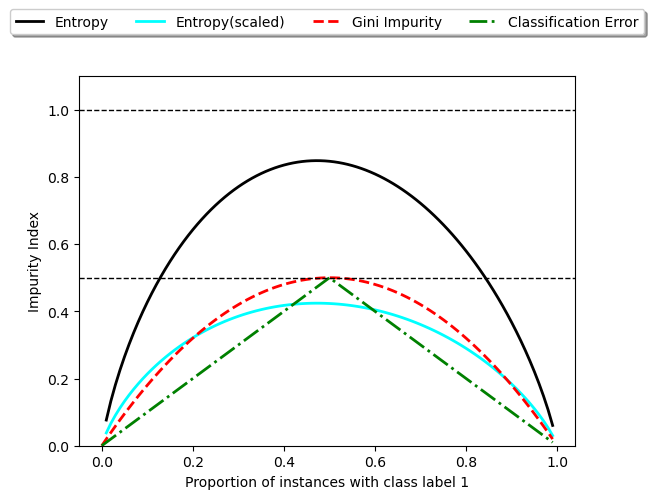

In [4]:
resolution = 0.01
prob_min, prob_max = 0.0, 1.0
variation = np.arange(prob_min, prob_max, resolution)

# list recording impurity
# entropy, scaled entropy, gini, misclassification error
ent = [entropy(p) if p!=0 else None for p in variation]
sc_ent = [(1/2)*e if e else None for e in ent]
Gini_ = [gini(p) for p in variation]
err = [error(p) for p in variation]

# Basic set up for subplot 
fig = plt.figure() # empty plot as initial frame
ax = plt.subplot(111) # 1st grid cell of 1X1 grid of subplot

# draw 4 trajectories for each impurity by iteration
# using method ax.plot(x-axis, y-axis)
# x-axis is variation, y-axis will be 4 impurities
for impurity, label, ls, c in zip([ent, sc_ent, Gini_, err],
                        ['Entropy', 'Entropy(scaled)','Gini Impurity','Classification Error'],
                        ['-','-','--','-.'],
                        ['black','cyan','red','green']):
    line = ax.plot(variation, impurity, 
                   label=label, linestyle=ls, lw=2, color=c)
    
    
# explanation label of plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=4, fancybox=True, shadow=True)
    
# draw half lines
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
    
# trim figure, add explanation
plt.ylim([0, 1.1])
plt.xlabel('Proportion of instances with class label 1')
plt.ylabel('Impurity Index')
plt.show()  

# Decision Tree Learning

## Import modules of model, performance criterion

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Preprocess tutorial, Treasury Squeeze Dataset
- Split the data into training and testing sets with binary features
- Prepare train dataset, Batch Size = 300
- Prepare test dataset, Batch Size = 600
- Feature selection : 'roll_start', 'price_distortion'
- Label: 'squeeze'


In [6]:
feature1, feature2 = 'roll_start', 'price_distortion'
label = 'squeeze'

train_df = df.iloc[:600, :][[feature1, feature2, label]]
test_df = df.iloc[600:, :][[feature1, feature2, label]]

In [7]:
train_X = train_df[[feature1, feature2]] 
train_y = train_df[[label]] 

In [8]:
test_X = test_df[[feature1, feature2]] 
test_y = test_df[[label]] 

In [9]:
train_X

,roll_start,price_distortion
0,0.016053,0.900783
1,1.000000,1.000000
2,0.673543,0.045987
3,0.063057,1.000000
4,0.726244,0.113601
...,...,...
595,0.132344,0.140695
596,0.811714,0.723217
597,0.187476,1.000000
598,0.027726,0.185432


In [10]:
train_y

,squeeze
0,True
1,False
2,False
3,True
4,False
...,...
595,True
596,True
597,True
598,False


In [11]:
test_X

,roll_start,price_distortion
600,1.000000,1.000000
601,0.130603,0.054925
602,0.038793,0.877739
603,0.869458,0.101122
604,0.574802,0.175089
...,...,...
895,1.000000,0.106219
896,0.193619,0.048638
897,1.000000,0.080241
898,0.889069,0.677024


In [12]:
test_y

,squeeze
600,True
601,False
602,False
603,False
604,True
...,...
895,False
896,False
897,True
898,True


## Method to preprocess dataset

- Different preprocessing methods are necessary to draw Decision boundary and Scatter plot each other to follow implementation of our textbook
- That is, labels for scatter plot must consist of 1-dimensional numpy array
- Use numpy.flatten() to reshape 2d array as 1d array

In [13]:
def preprocess_boundary(train_X, train_y, test_X, test_y):
    X = pd.concat([train_X, test_X]).values
    y = pd.concat([train_y, test_y]).values
    return X, y

In [14]:
def preprocess_scatter(train_X, train_y, test_X, test_y):
    X_ = pd.concat([train_X, test_X]).values
    y_ = pd.concat([train_y, test_y]).values.flatten()
    return X_, y_

## ML Model selection and training
- Select DecisionTreeClassifier 
- Hyperparamter tunning
- Predicted class label

In [15]:
tree = DecisionTreeClassifier(criterion='entropy',
                             max_depth=15,
                             random_state=1)
tree.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=1)

In [16]:
pred_y = tree.predict(test_X)

## ML model performance
- Here, prediceted class label: 1d, test label: 2d
- Reshape dimension of predicted class label as that of test label 
- measure performance of DecisionTreeClassifier

In [17]:
test_y_array = test_y.values
pred_y_array = np.reshape(pred_y, np.shape(test_y_array))
accuracy_score(test_y_array, pred_y_array)

0.63

## Visualize Decision Boundary of model

In [18]:
from matplotlib.colors import ListedColormap

In [19]:
def plot_decision_regions(train_X, train_y,
                          test_X, test_y,
                          classifier, resolution = 0.02):
    
    #####################
    # Decision Boundary #
    #####################
    
    X, y = preprocess_boundary(train_X, train_y, test_X, test_y)
    
    colors = ('red', 'blue', 'lightgreen', 'grey', 'cyan')
    markers = ('x', 'o', 's', 'v', '^')
    labelSet = np.unique(y)
    num_labels = len(labelSet)
    cmap = ListedColormap(colors[:num_labels])
    
    X1_min, X1_max = X[:, 0].min()-1, X[:, 0].max()+1
    X2_min, X2_max = X[:, 1].min()-1, X[:, 1].max()+1
    X1 = np.arange(X1_min, X1_max, resolution)
    X2 = np.arange(X2_min, X2_max, resolution)
    Xmesh1, Xmesh2 = np.meshgrid(X1, X2)
    X1_flatten, X2_flatten = Xmesh1.ravel(), Xmesh2.ravel()
    X_cat_T = np.array([X1_flatten, X2_flatten]).T
    
    Z_predict = classifier.predict(X_cat_T)
    Z_mesh = Z_predict.reshape(Xmesh1.shape)
    
    plt.contourf(Xmesh1, Xmesh2, Z_mesh, alpha=0.3, cmap=cmap)
    plt.xlim(Xmesh1.min(), Xmesh1.max())
    plt.ylim(Xmesh2.min(), Xmesh2.max())
    
    ###################
    # Scattering Plot #
    ###################
    
    X_, y_ = preprocess_scatter(train_X, train_y, test_X, test_y)
    
    for i, label in enumerate(labelSet):
        plt.scatter(x=X_[y_==label, 0], y=X_[y_==label, 1],
                   alpha=0.8,
                   color=colors[i],
                   marker=markers[i],
                   label=label,
                   edgecolor='black')
    

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/var/folders/vj/kdrj5g3x2v1drg6lzgtdwxb80000gn/T/ipykernel_5814/9952118.py:39: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X_[y_==label, 0], y=X_[y_==label, 1],


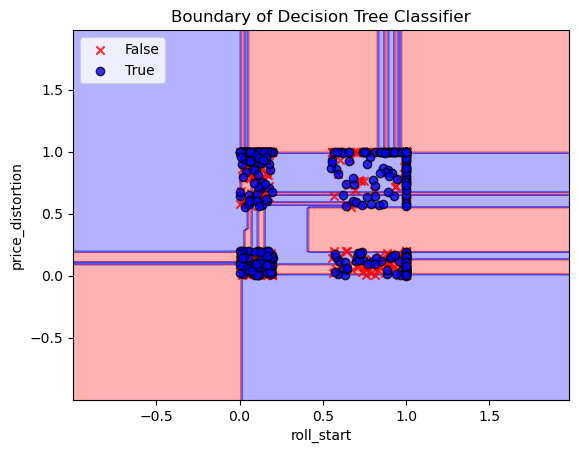

In [20]:
plot_decision_regions(train_X, train_y,
                     test_X, test_y,
                     classifier=tree)

plt.title('Boundary of Decision Tree Classifier')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(loc='upper left')
plt.show()

- Therefore, this Decision Tree Classifier seems like useful only at around rectangular regions, [roll_start] X [price_distortion] = [0.6, 0.9] X [0.0, 0.25] 
- Additionally, please look at point x, coordinated at (0.6, 0.2), seems like to be located boundary of red(False) and blue(True) region. This will be improved by choosing different model later, RandomForestClassifier.

## Create image of Decision Tree Classifier in PNG 

- I had upload PNG file at Github repository with source file, screenshot.

In [21]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

In [22]:
dot_data = export_graphviz(tree,
                          filled=True, rounded=True,
                          class_names=['True', 'False'],
                          feature_names=[feature1, feature2],
                          out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

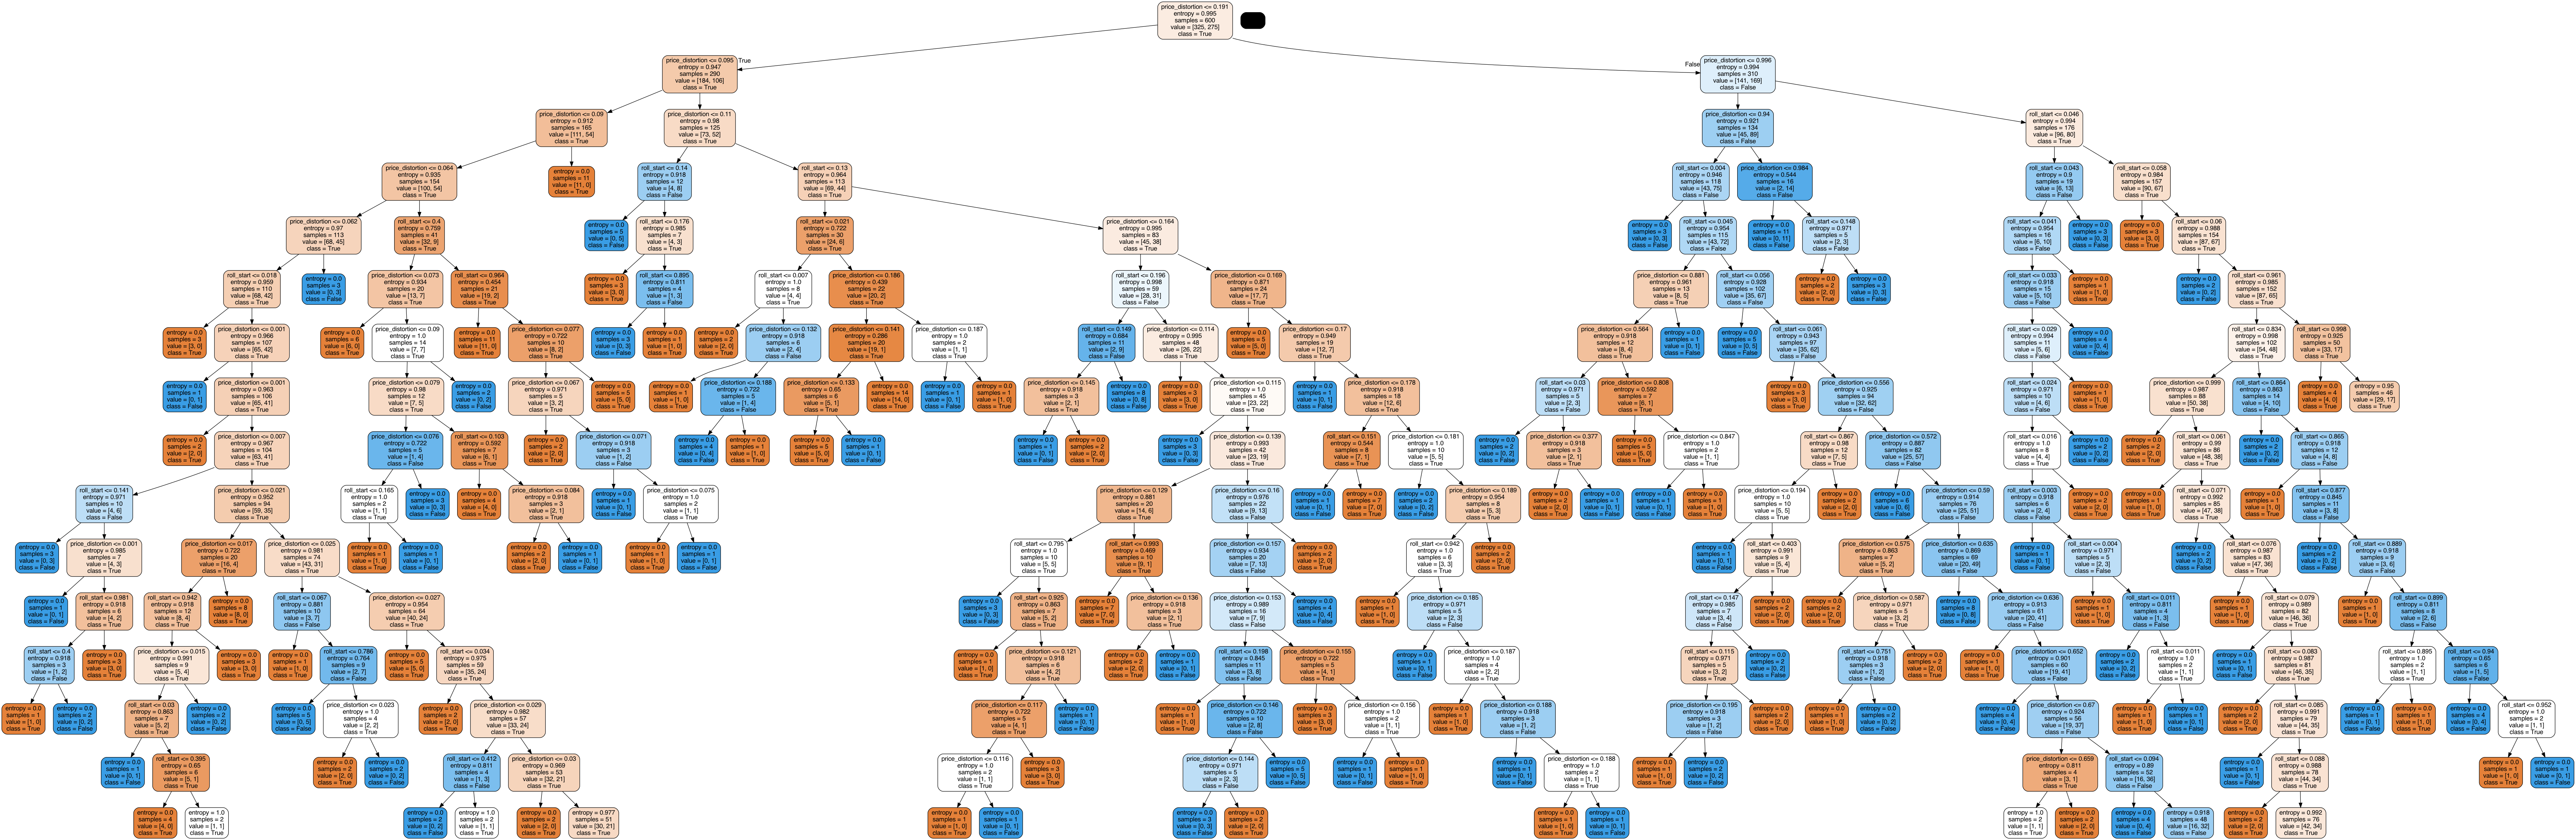

In [23]:
Image(filename='tree.png')

# Random Forest

## Import module of RandomForest

In [24]:
from sklearn.ensemble import RandomForestClassifier

## ML Model selection and training
- Select RandomForestClassifier 
- Hyperparamter tunning

In [25]:
forest = RandomForestClassifier(criterion='entropy',
                               n_estimators=25,
                               random_state=1,
                               n_jobs=2)
forest.fit(train_X, train_y)

/var/folders/vj/kdrj5g3x2v1drg6lzgtdwxb80000gn/T/ipykernel_5814/2872037610.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(train_X, train_y)


RandomForestClassifier(criterion='entropy', n_estimators=25, n_jobs=2,
                       random_state=1)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/var/folders/vj/kdrj5g3x2v1drg6lzgtdwxb80000gn/T/ipykernel_5814/9952118.py:39: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X_[y_==label, 0], y=X_[y_==label, 1],


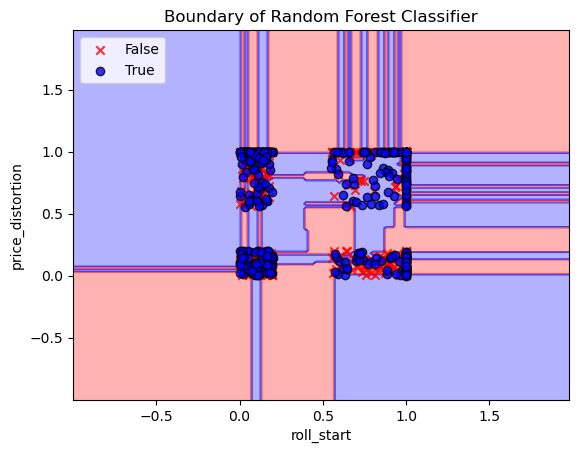

In [26]:
plot_decision_regions(train_X, train_y,
                     test_X, test_y,
                     classifier=forest)
plt.title('Boundary of Random Forest Classifier')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(loc='upper left')
plt.show()

- The point x, cordinated at (0.6, 0.2), is now classified at red region in perfect. Therefore, this RandomForestClassifier shows improvement of performace at around rectangular regions, [roll_start] X [price_distortion] = [0.6, 0.9] X [0.0, 0.25], compared to DecisionTreeClassifier before.

# K-Nearest Neighbor, KNN

- Import module of KNN and Standard Scaler

In [27]:
from sklearn.neighbors import KNeighborsClassifier

## Select sub-dataset and Preprocess it

- Select every datapoints at rectangular region, [0.6, 0.9] X [0.0, 0.25] from origial Treasury Squeeze DataFrame
- Our purpose is to make clusters on the rectangular region based on KNN model
- There exist total 53 data points in the rectangular
- Prepare train dataset, Batch Size = 40
- Prepare test dataset, Batch Size = 13
- Test different K to follow instruction of HW

In [28]:
feature1, feature2 = 'roll_start', 'price_distortion'
label = 'squeeze'

In [29]:
delta_f1 = (df[feature1] >= 0.6) & (df[feature1] <= 0.9)
delta_f2 = (df[feature2] >= 0.0) & (df[feature2] <= 0.25)
selected_df = df[ (delta_f1) & (delta_f2) ]
selected_df.shape[0]

53

In [30]:
train_df = selected_df.iloc[:40, :][[feature1, feature2, label]]
test_df = selected_df.iloc[40:, :][[feature1, feature2, label]]

- Zooming datasets 10 times on the rectangular region

In [31]:
train_X = train_df[[feature1, feature2]] * 10
train_y = train_df[[label] ] 

In [32]:
test_X = test_df[[feature1, feature2]] * 10
test_y = test_df[[label]] 

## ML Model Selection and Training
- Select KNeighborhoodsClassifier 
- KNN is non-parameteric model to launch instance based learning
- Use Minkowski norm of p=2 (Euclidean norm) to measure distance
- Test different K to follow instruction of HW

### K=2
- KNN model has 5 clusters for binary classification problem
- This model is overfitted, since it has so many clusters

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/var/folders/vj/kdrj5g3x2v1drg6lzgtdwxb80000gn/T/ipykernel_5814/9952118.py:39: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X_[y_==label, 0], y=X_[y_==label, 1],


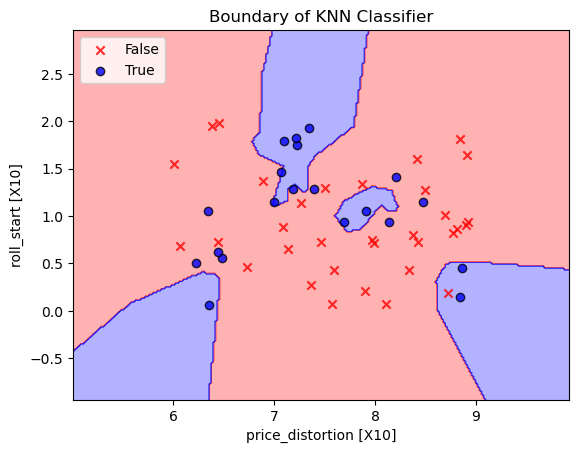

In [33]:
knn = KNeighborsClassifier(n_neighbors=2, p=2,
                              metric='minkowski')
knn.fit(train_X, train_y)

plot_decision_regions(train_X, train_y,
                     test_X, test_y,
                     classifier=knn)
plt.title('Boundary of KNN Classifier')
plt.xlabel('price_distortion [X10]')
plt.ylabel('roll_start [X10]')
plt.legend(loc='upper left')
plt.show()

### K=3

- This is the best choid of K to prevent underfitting and overfitting

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/var/folders/vj/kdrj5g3x2v1drg6lzgtdwxb80000gn/T/ipykernel_5814/9952118.py:39: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X_[y_==label, 0], y=X_[y_==label, 1],


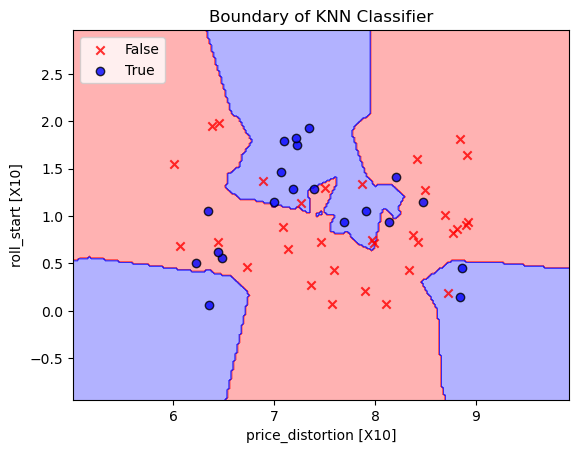

In [34]:
knn = KNeighborsClassifier(n_neighbors=3, p=2,
                              metric='minkowski')
knn.fit(train_X, train_y)

plot_decision_regions(train_X, train_y,
                     test_X, test_y,
                     classifier=knn)
plt.title('Boundary of KNN Classifier')
plt.xlabel('price_distortion [X10]')
plt.ylabel('roll_start [X10]')
plt.legend(loc='upper left')
plt.show()

## K=4
- KNN model of K=4 show poor performance of predicting true labeled points on two intervals [6, 7], [8, 9] of price_distortion [X10].
- This model is underfitted.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/var/folders/vj/kdrj5g3x2v1drg6lzgtdwxb80000gn/T/ipykernel_5814/9952118.py:39: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X_[y_==label, 0], y=X_[y_==label, 1],


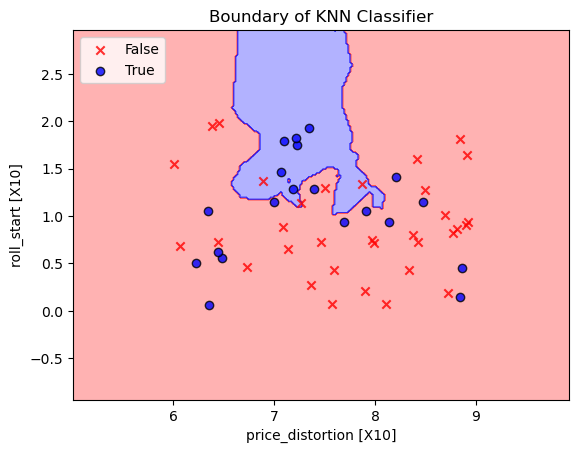

In [35]:
knn = KNeighborsClassifier(n_neighbors=4, p=2,
                              metric='minkowski')
knn.fit(train_X, train_y)

plot_decision_regions(train_X, train_y,
                     test_X, test_y,
                     classifier=knn)
plt.title('Boundary of KNN Classifier')
plt.xlabel('price_distortion [X10]')
plt.ylabel('roll_start [X10]')
plt.legend(loc='upper left')
plt.show()

# Academic Integrity Instruction

In [36]:
print("My name is Kibae Kim")
print("My NetID is: kibaek2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Kibae Kim
My NetID is: kibaek2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
